<a href="https://colab.research.google.com/github/serdargoler/Correlation-between-cryptos/blob/master/crypto_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     |████████████████████████████████| 5.3 MB 5.1 MB/s 
     |████████████████████████████████| 148 kB 48.5 MB/s 
     |████████████████████████████████| 97 kB 7.2 MB/s 
     |████████████████████████████████| 503 kB 55.5 MB/s 
     |████████████████████████████████| 410 kB 55.5 MB/s 
     |████████████████████████████████| 6.3 MB 25.5 MB/s 
     |████████████████████████████████| 138 kB 64.1 MB/s 
     |████████████████████████████████| 191 kB 63.5 MB/s 
     |████████████████████████████████| 1.5 MB 67.0 MB/s 
     |████████████████████████████████| 2.1 MB 42.9 MB/s 
     |████████████████████████████████| 748 kB 68.5 MB/s 
     |████████████████████████████████| 743 kB 55.8 MB/s 
     |████████████████████████████████| 294 kB 55.9 MB/s 
     |████████████████████████████████| 3.5 MB 23.7 MB/s 
     |████████████████████████████████| 1.3 MB 66.4 MB/s 
     |████████████████████████████████| 160 kB 57.2 MB/s 
     |████████████████████████████████| 291 kB 46.8 MB/s 
     |███████████

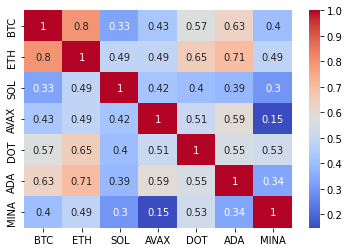

In [1]:
!pip install fastquant
import fastquant as fq
import matplotlib.pyplot as plt
import seaborn as sns

currency = "USDT"
metric = "close"
start = '2020-01-01'
end = '2021-10-30'
crypto = ["BTC", "ETH", "SOL", "AVAX", "DOT", "ADA", "MINA"]

colnames = []
first = True

for ticker in crypto:
    data = fq.get_crypto_data(f'{ticker}/{currency}', start, end)
    if first:
        combined = data[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(data[metric])
        colnames.append(ticker)
        combined.columns = colnames

combined = combined.pct_change().corr(method='pearson')
sns.heatmap(combined, annot=True, cmap="coolwarm")
plt.show()